<a href="https://colab.research.google.com/github/ImagingDataCommons/Cloud-Resources-Workflows/blob/notebooks2/Notebooks/Totalsegmentator/inferenceTotalSegmentatorNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**This Notebook performs inference using TotalSegmentator (v1.5.6) with CT NIfTI file as input and produces multilabel Segmentation Maps NIfTI file**

Please cite:

Jakob Wasserthal, Manfred Meyer, Hanns-Christian Breit, Joshy Cyriac, Shan Yang, & Martin Segeroth. (2022). TotalSegmentator: robust segmentation of 104 anatomical structures in CT images. https://doi.org/10.48550/arXiv.2208.05868

Isensee, F., Jaeger, P.F., Kohl, S.A.A. et al. nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nat Methods 18, 203–211 (2021). https://doi.org/10.1038/s41592-020-01008-z

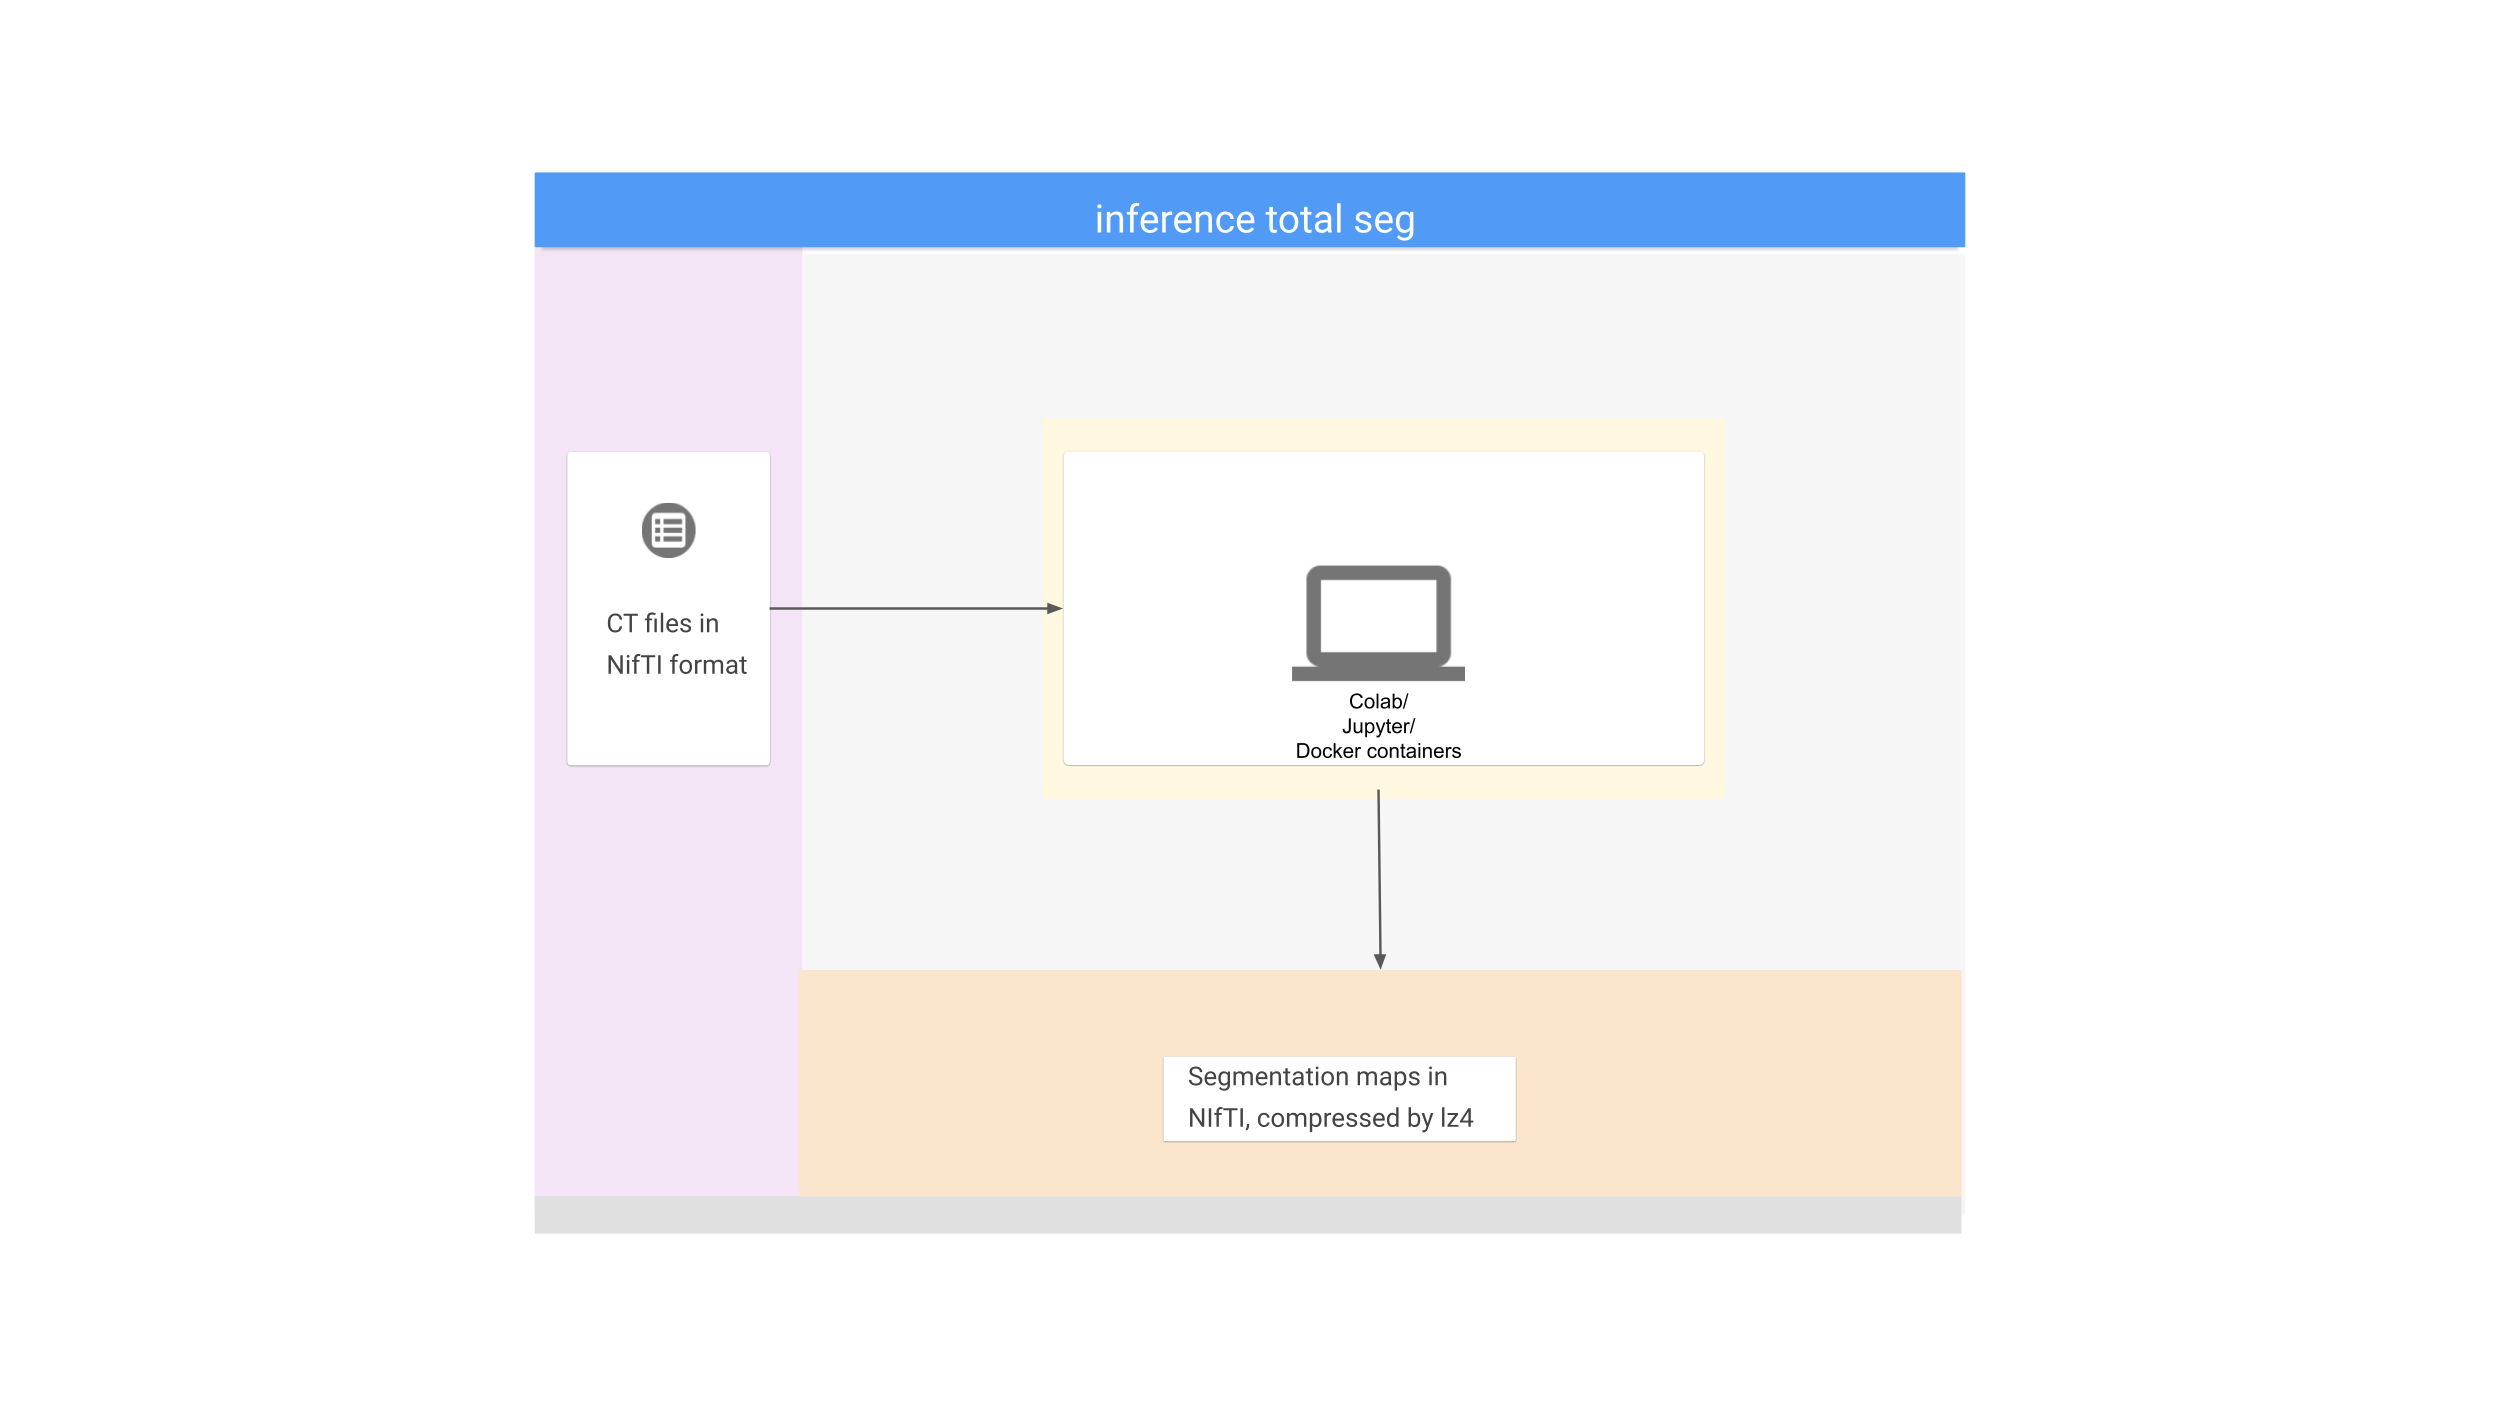

Expected file directory
```
dcm2niix
 └─── $series_id_1
       ├─── $CT_NIfTI.nii.gz
       │
 └───  $series_id_2
       ├─── $CT_NIfTI.nii.gz
       ├───  ...
       │
 └───  $series_id_n
       └─── $CT_NIfTI.nii.gz

```

###**Ways to utilize this notebook**


*   **Colab**
*   **DockerContainer/Terra/SB-CGC**


####**Colab**
*  This notebook was initally developed and tested on Colab, and a working version is saved on github
*  To run this notebook with Colab, Click 'Open In Colab' icon on top left 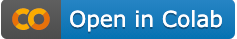
*Uncomment all the cells under "Installing Packages"
*Provide the path to lz4 compressed file containing CT NIfTI files as shown 'Expected file directory' under "Parameters for Papermill"
* A sample lz4 file is provided for convenience can be downloaded by uncommenting and running the cells in "For local testing"
* Run each cell to install the packages and to run the inference using TotalSegmentator and the segmentation maps in NIfTI format are saved in lz4 compressed format


####**Docker**
* This notebook is saved by default in a way that's amenable to be used on Terra/SB-CGC platforms using Docker
* Running this notebook in a docker container ensures reproduciblity, as we lock the run environment beginning from the base docker image to pip packages in the docker image

* Docker images can be found @ https://hub.docker.com/repository/docker/imagingdatacommons/inference_totalseg/tags
* The link to dockerfile along with git commit hash used for building the docker image can be found in one of the layers called 'LABEL'

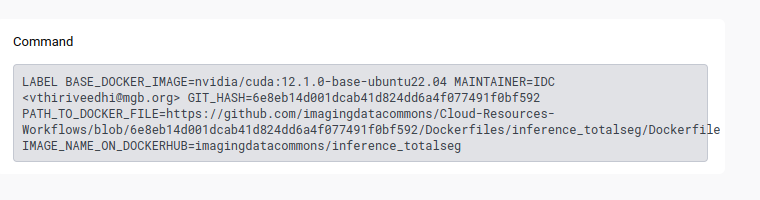
* We use a python package called Papermill, that can run the notebook with out having to convert it to python script. This allows us maintain one copy of code instead of two.
* To use papermill, download this notebook and tag the cell under 'Parameters for Papermill" as parameters using jupyternotebook or jupyterlab as instructed @ https://papermill.readthedocs.io/en/latest/usage-parameterize.html#designate-parameters-for-a-cell
* A sample papermill command is
<pre>
papermill -p niftiFilePath path_to_ct_nifti_files.lz4 inferenceTotalSegmentatorNotebook.ipynb.ipynb  output_inferenceTotalSegmentatorNotebook.ipynb
</pre>




###**Installing Packages**

In [1]:
# # %%capture
# !sudo apt-get update && apt-get install -y --no-install-recommends \
#     build-essential\
#     ffmpeg\
#     lz4\
#     python3-dev\
#     python3-pip\
#     wget\
#     unzip\
#     xvfb\
#   && rm -rf /var/lib/apt/lists/*

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:6 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:10 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,326 kB]
Get:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy/main amd64 Packages [39.8 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Get:13 http://archive.ubunt

In [2]:
# # %%capture
# !pip install --no-cache-dir \
#     ipykernel==6.22.0\
#     ipython==8.12.0\
#     ipywidgets==8.0.6\
#     jupyter==1.0.0\
#     papermill==2.4.0\
#     nvidia-ml-py3==7.352.0\
#     requests==2.27.1\
#     TotalSegmentator==1.5.6\
#  && pip install --no-cache-dir \
#     pyradiomics==3.0.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 796.4/796.4 kB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.3/138.3 kB 303.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 196.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 220.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 139.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 128.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 226.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 203.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 36.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.8/510

###**Importing Packages**

In [3]:
import glob
import os
import sys
import shutil
from pathlib import Path
import time
import subprocess
from concurrent.futures import ThreadPoolExecutor
from time import sleep
from datetime import datetime
import psutil
import pandas as pd
import matplotlib.pyplot as plt
import nvidia_smi

Thu Dec 14 20:58:13 2023

Current directory :/content
Python version    : 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]


###**Current Environment**

In [ ]:
curr_dir   = Path().absolute()

print(time.asctime(time.localtime()))
print("\nCurrent directory :{}".format( curr_dir))
print("Python version    :", sys.version.split('\n')[0])

###**Parameters for Papermill**

In [4]:
niftiFilePath=''

###**Local testing**

In [5]:
# !pip install gdown

In [6]:
# !gdown "https://drive.google.com/uc?id=1LsRPn_gTWUwVZwrcnSllogTaw8MW2d2M"
# niftiFilePath= glob.glob("*.lz4")[0]

/usr/local/lib/python3.10/dist-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.18) or chardet (5.2.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "
Downloading...
From: https://drive.google.com/uc?id=1LsRPn_gTWUwVZwrcnSllogTaw8MW2d2M
To: /content/_1_downloadDicomAndConvertNiftiFiles.tar.lz4
100% 464M/464M [00:11<00:00, 41.7MB/s]


###**Decompressing NIFTI files from first step**

In [7]:
!lz4 -d --rm {niftiFilePath} -c | tar  --strip-components=0  -xvf -

dcm2niix/
dcm2niix/1.3.6.1.4.1.14519.5.2.1.7009.9004.118722452529394350711166589345/
dcm2niix/1.3.6.1.4.1.14519.5.2.1.7009.9004.118722452529394350711166589345/1.3.6.1.4.1.14519.5.2.1.7009.9004.11872245252939435071116658934_1_OPA_GE_LSPR16_STANDARD_330_2.5_120_80_58.2_1.4_20000102000000_2.nii.gz
dcm2niix/1.3.6.1.4.1.14519.5.2.1.7009.9004.431377773401197924485551006033/
dcm2niix/1.3.6.1.4.1.14519.5.2.1.7009.9004.431377773401197924485551006033/1.3.6.1.4.1.14519.5.2.1.7009.9004.43137777340119792448555100603_1_OPA_GE_LS16_STANDARD_339_2.5_120_40_29.1_1.4_20000102000000_2.nii.gz
dcm2niix/1.2.840.113654.2.55.100875189782210690344207306235124901243/
dcm2niix/1.2.840.113654.2.55.100875189782210690344207306235124901243/1.2.840.113654.2.55.100875189782210690344207306235124901243_0_OPA_GE_LSQX_STANDARD_360_2.5_120_na_na_na_19990102000000_2.nii.gz
dcm2niix/1.2.840.113654.2.55.113040386178547843571271236478024341696/
dcm2niix/1.2.840.113654.2.55.113040386178547843571271236478024341696/1.2.840.113654

###**Defining Functions**

In [8]:
#create directory for TotalSegmentator Output files
try:
  shutil.rmtree('Inference')

except OSError:
  pass
os.mkdir('Inference')

In [9]:
class MemoryMonitor:
    def __init__(self):
        self.keep_measuring = True
        self.working_disk_path = self.get_working_disk_path()

    def get_working_disk_path(self):
        partitions = psutil.disk_partitions()
        for partition in partitions:
            if partition.mountpoint == '/':
                return '/'
            elif '/cromwell_root' in partition.mountpoint:
                return '/cromwell_root'
        return '/'  # Default to root directory if no specific path is found
    def measure_usage(self):
        cpu_usage = []
        ram_usage_mb=[]
        gpu_usage_mb=[]
        disk_usage_all=[]
        time_stamps = []
        start_time = time.time()
        while self.keep_measuring:
            cpu = psutil.cpu_percent()
            ram = psutil.virtual_memory()
            disk_usage = psutil.disk_usage(self.working_disk_path)
            disk_used = disk_usage.used / 1024 / 1024 / 1024
            disk_total = disk_usage.total / 1024 / 1024 / 1024
            ram_total_mb = psutil.virtual_memory().total / 1024 / 1024
            ram_mb = (ram.total - ram.available) / 1024 / 1024

            nvidia_smi.nvmlInit()
            handle = nvidia_smi.nvmlDeviceGetHandleByIndex(0)
            info = nvidia_smi.nvmlDeviceGetMemoryInfo(handle)
            gpu_type = nvidia_smi.nvmlDeviceGetName(handle)
            gpu_total_mb = info.total/1024/1024
            gpu_mb = info.used/1024/1024
            nvidia_smi.nvmlShutdown()

            cpu_usage.append(cpu)
            ram_usage_mb.append(ram_mb)
            disk_usage_all.append(disk_used)
            gpu_usage_mb.append(gpu_mb)
            time_stamps.append(time.time()- start_time)
            sleep(1)

        return cpu_usage, ram_usage_mb, time_stamps, ram_total_mb, gpu_usage_mb, gpu_total_mb, gpu_type, disk_usage_all, disk_total

In [10]:
def check_total_segmentator_errors(series_id: str):
  """
  This function checks if the output files from TotalSegmentator exist.

  Args:
  series_id (str): The DICOM Tag SeriesInstanceUID of the DICOM series to be checked.

  Returns:
  bool: True if any of the output files do not exist, False otherwise.
  """

  # Define the output files from TotalSegmentator
  output_files = [f"{curr_dir}/Inference/{series_id}/segmentations.nii"]

  # Check if all output files exist
  if not all(os.path.exists(file) for file in output_files):
      # If any of the output files do not exist, log an error
      with open('totalsegmentator_errors.txt', 'a') as f:
          f.write(f"Error: TotalSegmentator failed for series {series_id}\n")
      return True

  return False


In [11]:
def inferenceTotalSegmentator(series_id: str) -> None:
    """
    This function performs inference using TotalSegmentator on a given series.

    Args:
    series_id (str): The DICOM Tag SeriesInstanceUID of the DICOM series to be processed.
    """

    # Remove existing directories and files if they exist
    shutil.rmtree(f'Inference/{series_id}', ignore_errors=True)
    shutil.rmtree(f'metadata/{series_id}', ignore_errors=True)
    for file in ['segmentations.nii.gz']:
        try:
            os.remove(file)
        except OSError:
            pass

    # Create a new directory for the series
    os.makedirs(f'Inference/{series_id}', exist_ok=True)

    print(f"Processing series: {series_id}")

    log = pd.DataFrame({'SeriesInstanceUID': [series_id]})
    series_id_folder_path = os.path.join(curr_dir, 'dcm2niix', series_id)

    # Get the first (and only) file in the list
    nifti_filename = os.listdir(series_id_folder_path)[0]
    nifti_filename_path = os.path.join(series_id_folder_path, nifti_filename)

    start_time = time.time()
    result = subprocess.run(['TotalSegmentator', '-i', nifti_filename_path, '-o', 'segmentations', '--ml'], stdout=subprocess.PIPE, stderr=subprocess.PIPE,  universal_newlines=True)
    print(result.stdout)
    total_segmentator_time = time.time() - start_time

    # Move the output files to the appropriate directory
    try:
        shutil.move(f"{curr_dir}/segmentations.nii", f"{curr_dir}/Inference/{series_id}/")
        print("Files moved successfully using the first command")
    except FileNotFoundError:
        try:
            shutil.move("segmentations/segmentations.nii", f"{curr_dir}/Inference/{series_id}/")
            print("Files moved successfully using the second command")
        except FileNotFoundError:
            print("Error: Failed to move files using both commands")


    check_total_segmentator_errors(series_id)

    shutil.move(f"{curr_dir}/Inference/{series_id}/segmentations.nii", f"{curr_dir}/Inference/{series_id}/{series_id}.nii")

    start_time = time.time()
    subprocess.run(["lz4", "--rm", f"{curr_dir}/Inference/{series_id}/{series_id}.nii", f"{curr_dir}/Inference/{series_id}/{series_id}.nii.lz4"], check=True)

    archiving_time = time.time() - start_time

    log['total_segmentator_time'] = total_segmentator_time
    log['archiving_time'] = archiving_time

    shutil.rmtree(f"{curr_dir}/dcm2niix/{series_id}", ignore_errors=True)

    global runtime_stats
    runtime_stats = pd.concat([runtime_stats, log], ignore_index=True, axis=0)


###**Total Segmentator**

Processing series: 1.2.840.113654.2.55.216614002338888733987350522981366678482

If you use this tool please cite: https://doi.org/10.48550/arXiv.2208.05868

Download finished. Extracting...
  downloaded in 23.90s
Download finished. Extracting...
  downloaded in 19.05s
Download finished. Extracting...
  downloaded in 20.66s
Download finished. Extracting...
  downloaded in 20.00s
Download finished. Extracting...
  downloaded in 19.19s
Resampling...
  Resampled in 6.65s
Predicting part 1 of 5 ...

If you use this tool please cite: https://doi.org/10.48550/arXiv.2208.05868

Download finished. Extracting...
  downloaded in 23.90s
Download finished. Extracting...
  downloaded in 19.05s
Download finished. Extracting...
  downloaded in 20.66s
Download finished. Extracting...
  downloaded in 20.00s
Download finished. Extracting...
  downloaded in 19.19s
Resampling...
  Resampled in 6.65s
Predicting part 1 of 5 ...
Predicting part 2 of 5 ...

If you use this tool please cite: https://doi.org/10.

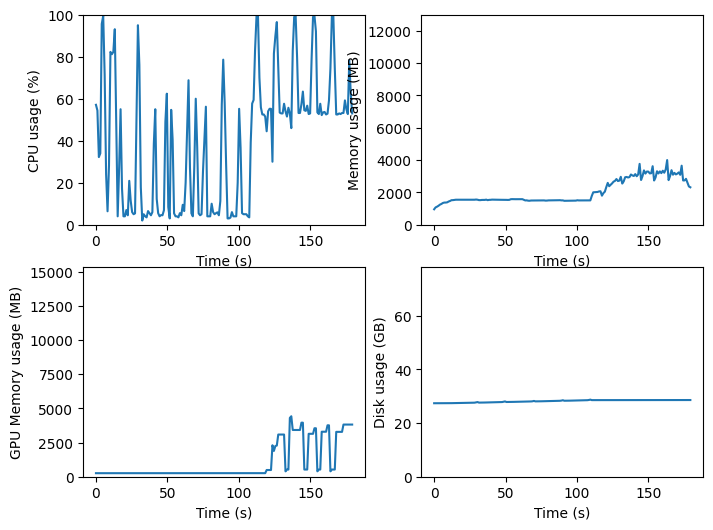

Processing series: 1.2.840.113654.2.55.142419057730651121165090739113900499978

If you use this tool please cite: https://doi.org/10.48550/arXiv.2208.05868

Resampling...
  Resampled in 7.47s
Predicting part 1 of 5 ...

If you use this tool please cite: https://doi.org/10.48550/arXiv.2208.05868

Resampling...
  Resampled in 7.47s
Predicting part 1 of 5 ...
Predicting part 2 of 5 ...

If you use this tool please cite: https://doi.org/10.48550/arXiv.2208.05868

Resampling...
  Resampled in 7.47s
Predicting part 1 of 5 ...
Predicting part 2 of 5 ...
Predicting part 3 of 5 ...

If you use this tool please cite: https://doi.org/10.48550/arXiv.2208.05868

Resampling...
  Resampled in 7.47s
Predicting part 1 of 5 ...
Predicting part 2 of 5 ...
Predicting part 3 of 5 ...
Predicting part 4 of 5 ...

If you use this tool please cite: https://doi.org/10.48550/arXiv.2208.05868

Resampling...
  Resampled in 7.47s
Predicting part 1 of 5 ...
Predicting part 2 of 5 ...
Predicting part 3 of 5 ...
Predi

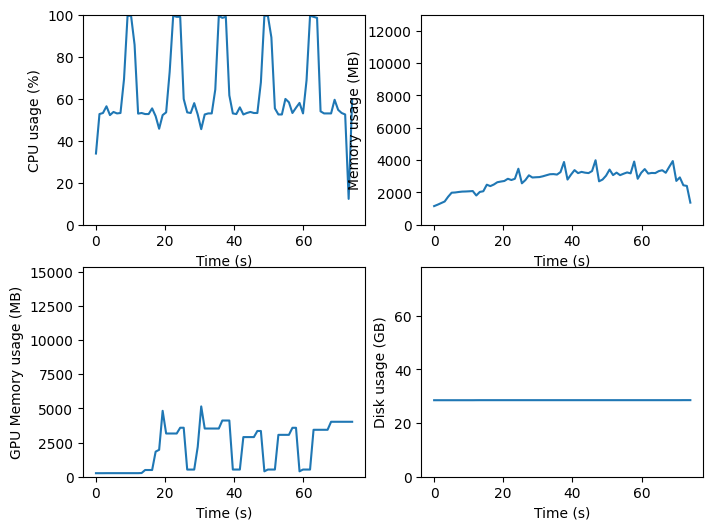

Processing series: 1.2.840.113654.2.55.185309182591805634517860395342326800332

If you use this tool please cite: https://doi.org/10.48550/arXiv.2208.05868

Resampling...
  Resampled in 6.02s
Predicting part 1 of 5 ...

If you use this tool please cite: https://doi.org/10.48550/arXiv.2208.05868

Resampling...
  Resampled in 6.02s
Predicting part 1 of 5 ...
Predicting part 2 of 5 ...

If you use this tool please cite: https://doi.org/10.48550/arXiv.2208.05868

Resampling...
  Resampled in 6.02s
Predicting part 1 of 5 ...
Predicting part 2 of 5 ...
Predicting part 3 of 5 ...

If you use this tool please cite: https://doi.org/10.48550/arXiv.2208.05868

Resampling...
  Resampled in 6.02s
Predicting part 1 of 5 ...
Predicting part 2 of 5 ...
Predicting part 3 of 5 ...
Predicting part 4 of 5 ...

If you use this tool please cite: https://doi.org/10.48550/arXiv.2208.05868

Resampling...
  Resampled in 6.02s
Predicting part 1 of 5 ...
Predicting part 2 of 5 ...
Predicting part 3 of 5 ...
Predi

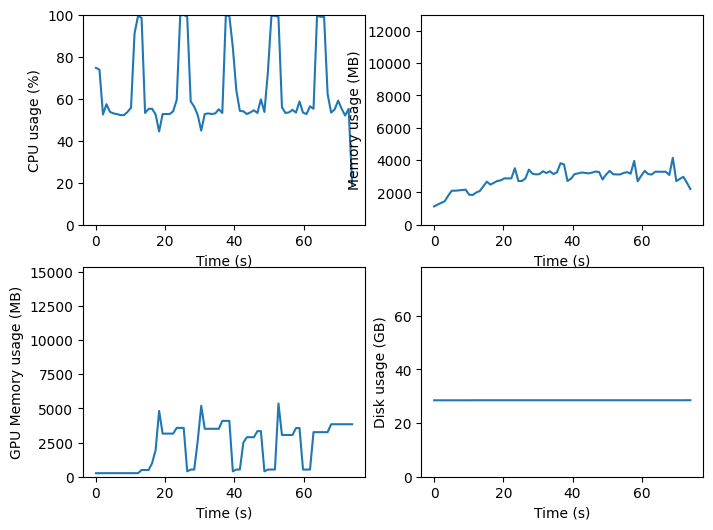

Processing series: 1.2.840.113654.2.55.100875189782210690344207306235124901243

If you use this tool please cite: https://doi.org/10.48550/arXiv.2208.05868

Resampling...
  Resampled in 6.12s
Predicting part 1 of 5 ...

If you use this tool please cite: https://doi.org/10.48550/arXiv.2208.05868

Resampling...
  Resampled in 6.12s
Predicting part 1 of 5 ...
Predicting part 2 of 5 ...

If you use this tool please cite: https://doi.org/10.48550/arXiv.2208.05868

Resampling...
  Resampled in 6.12s
Predicting part 1 of 5 ...
Predicting part 2 of 5 ...
Predicting part 3 of 5 ...

If you use this tool please cite: https://doi.org/10.48550/arXiv.2208.05868

Resampling...
  Resampled in 6.12s
Predicting part 1 of 5 ...
Predicting part 2 of 5 ...
Predicting part 3 of 5 ...
Predicting part 4 of 5 ...

If you use this tool please cite: https://doi.org/10.48550/arXiv.2208.05868

Resampling...
  Resampled in 6.12s
Predicting part 1 of 5 ...
Predicting part 2 of 5 ...
Predicting part 3 of 5 ...
Predi

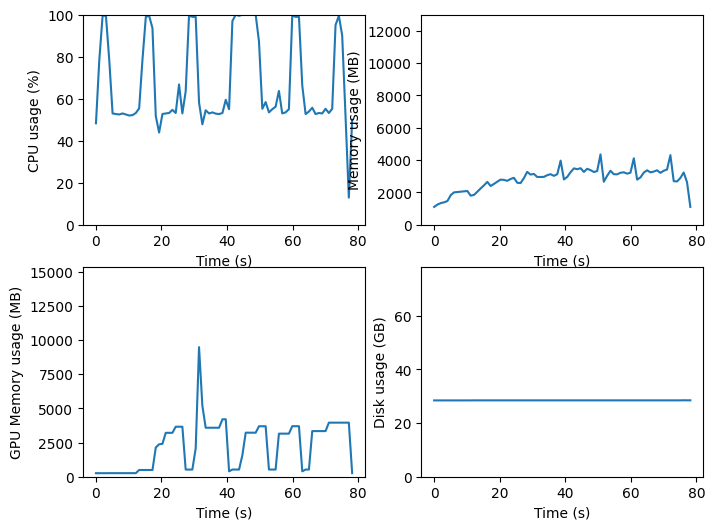

Processing series: 1.2.840.113654.2.55.14382674871619950799472325766084940706

If you use this tool please cite: https://doi.org/10.48550/arXiv.2208.05868

Resampling...
  Resampled in 6.68s
Predicting part 1 of 5 ...

If you use this tool please cite: https://doi.org/10.48550/arXiv.2208.05868

Resampling...
  Resampled in 6.68s
Predicting part 1 of 5 ...
Predicting part 2 of 5 ...

If you use this tool please cite: https://doi.org/10.48550/arXiv.2208.05868

Resampling...
  Resampled in 6.68s
Predicting part 1 of 5 ...
Predicting part 2 of 5 ...
Predicting part 3 of 5 ...

If you use this tool please cite: https://doi.org/10.48550/arXiv.2208.05868

Resampling...
  Resampled in 6.68s
Predicting part 1 of 5 ...
Predicting part 2 of 5 ...
Predicting part 3 of 5 ...
Predicting part 4 of 5 ...

If you use this tool please cite: https://doi.org/10.48550/arXiv.2208.05868

Resampling...
  Resampled in 6.68s
Predicting part 1 of 5 ...
Predicting part 2 of 5 ...
Predicting part 3 of 5 ...
Predic

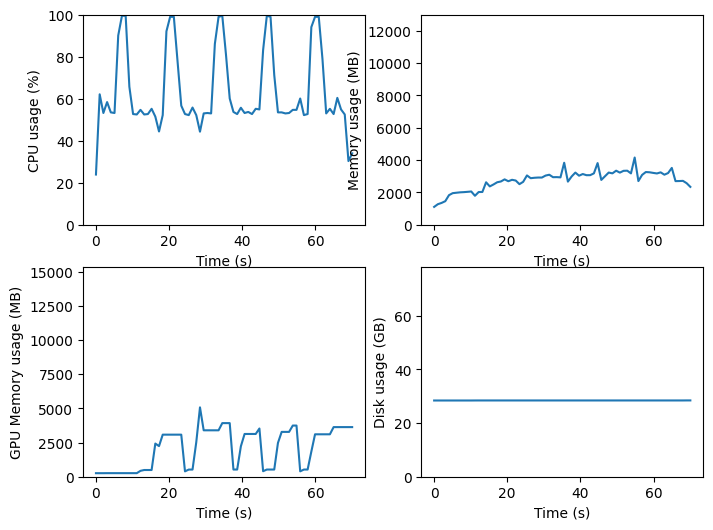

Processing series: 1.2.840.113654.2.55.243990451406006403331425809632881193215

If you use this tool please cite: https://doi.org/10.48550/arXiv.2208.05868

Resampling...
  Resampled in 7.09s
Predicting part 1 of 5 ...

If you use this tool please cite: https://doi.org/10.48550/arXiv.2208.05868

Resampling...
  Resampled in 7.09s
Predicting part 1 of 5 ...
Predicting part 2 of 5 ...

If you use this tool please cite: https://doi.org/10.48550/arXiv.2208.05868

Resampling...
  Resampled in 7.09s
Predicting part 1 of 5 ...
Predicting part 2 of 5 ...
Predicting part 3 of 5 ...

If you use this tool please cite: https://doi.org/10.48550/arXiv.2208.05868

Resampling...
  Resampled in 7.09s
Predicting part 1 of 5 ...
Predicting part 2 of 5 ...
Predicting part 3 of 5 ...
Predicting part 4 of 5 ...

If you use this tool please cite: https://doi.org/10.48550/arXiv.2208.05868

Resampling...
  Resampled in 7.09s
Predicting part 1 of 5 ...
Predicting part 2 of 5 ...
Predicting part 3 of 5 ...
Predi

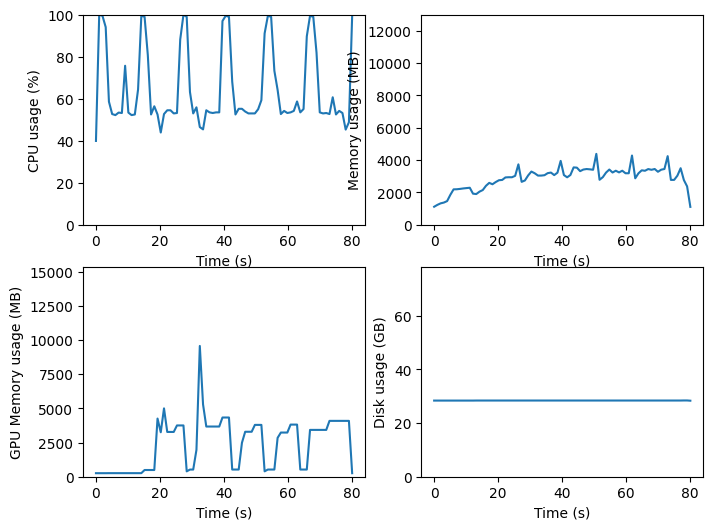

Processing series: 1.2.840.113654.2.55.113040386178547843571271236478024341696

If you use this tool please cite: https://doi.org/10.48550/arXiv.2208.05868

Resampling...
  Resampled in 8.58s
Predicting part 1 of 5 ...

If you use this tool please cite: https://doi.org/10.48550/arXiv.2208.05868

Resampling...
  Resampled in 8.58s
Predicting part 1 of 5 ...
Predicting part 2 of 5 ...

If you use this tool please cite: https://doi.org/10.48550/arXiv.2208.05868

Resampling...
  Resampled in 8.58s
Predicting part 1 of 5 ...
Predicting part 2 of 5 ...
Predicting part 3 of 5 ...

If you use this tool please cite: https://doi.org/10.48550/arXiv.2208.05868

Resampling...
  Resampled in 8.58s
Predicting part 1 of 5 ...
Predicting part 2 of 5 ...
Predicting part 3 of 5 ...
Predicting part 4 of 5 ...

If you use this tool please cite: https://doi.org/10.48550/arXiv.2208.05868

Resampling...
  Resampled in 8.58s
Predicting part 1 of 5 ...
Predicting part 2 of 5 ...
Predicting part 3 of 5 ...
Predi

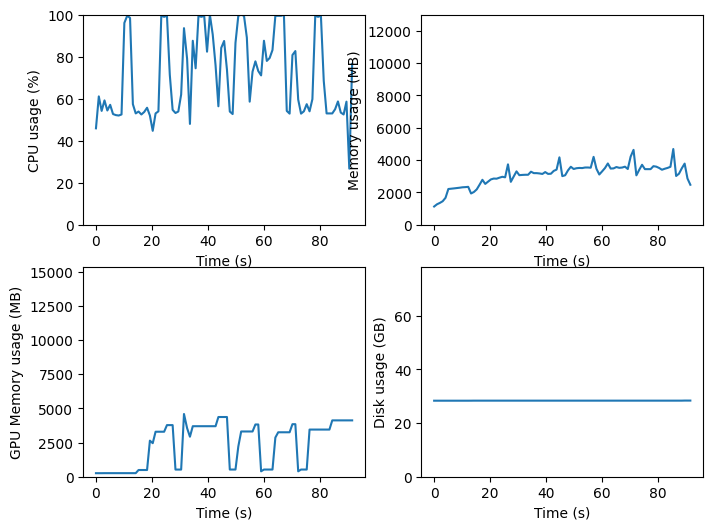

Processing series: 1.3.6.1.4.1.14519.5.2.1.7009.9004.118722452529394350711166589345


In [ ]:
runtime_stats = pd.DataFrame(columns=['SeriesInstanceUID','total_segmentator_time',
                                      'archiving_time', 'cpu_usage','ram_usage_mb', 'ram_total_mb',
                                      'gpu_usage_mb', 'gpu_total_mb', 'gpu_type', 'disk_usage_all', 'disk_total'
                                      ])
if __name__ == "__main__":
    for series_id in os.listdir(f'{curr_dir}/dcm2niix'):
        with ThreadPoolExecutor() as executor:
            monitor = MemoryMonitor()
            mem_thread = executor.submit(monitor.measure_usage)
            try:
                proc_thread = executor.submit(inferenceTotalSegmentator, series_id)
                proc_thread.result()
            finally:
                monitor.keep_measuring = False
                cpu_usage, ram_usage_mb, time_stamps, ram_total_mb, gpu_usage_mb, gpu_total_mb, gpu_type, disk_usage_all, disk_total= mem_thread.result()

                cpu_idx = runtime_stats.index[runtime_stats['SeriesInstanceUID'] == series_id][0]
                runtime_stats.iloc[cpu_idx, runtime_stats.columns.get_loc('cpu_usage')] = [[cpu_usage]]

                ram_usage_mb_idx = runtime_stats.index[runtime_stats['SeriesInstanceUID'] == series_id][0]
                runtime_stats.iloc[ram_usage_mb_idx, runtime_stats.columns.get_loc('ram_usage_mb')] = [[ram_usage_mb]]

                ram_total_mb_idx = runtime_stats.index[runtime_stats['SeriesInstanceUID'] == series_id][0]
                runtime_stats.iloc[ram_total_mb_idx, runtime_stats.columns.get_loc('ram_total_mb')] = [[ram_total_mb]]

                gpu_total_mb_idx = runtime_stats.index[runtime_stats['SeriesInstanceUID'] == series_id][0]
                runtime_stats.iloc[gpu_total_mb_idx, runtime_stats.columns.get_loc('gpu_total_mb')] = [[gpu_total_mb]]

                gpu_usage_mb_idx = runtime_stats.index[runtime_stats['SeriesInstanceUID'] == series_id][0]
                runtime_stats.iloc[gpu_usage_mb_idx, runtime_stats.columns.get_loc('gpu_usage_mb')] = [[gpu_usage_mb]]

                disk_usage_gb_idx = runtime_stats.index[runtime_stats['SeriesInstanceUID'] == series_id][0]
                runtime_stats.iloc[disk_usage_gb_idx, runtime_stats.columns.get_loc('disk_usage_all')] = [[disk_usage_all]]

                runtime_stats['gpu_type']=gpu_type
                runtime_stats['disk_total']=disk_total

                fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(8, 6))

                ax1.plot(time_stamps, cpu_usage)
                ax1.set_ylim(0, 100)
                ax1.set_xlabel('Time (s)')
                ax1.set_ylabel('CPU usage (%)')

                ax2.plot(time_stamps, ram_usage_mb)
                ax2.set_ylim(0, ram_total_mb)
                ax2.set_xlabel('Time (s)')
                ax2.set_ylabel('Memory usage (MB)')

                ax3.plot(time_stamps, gpu_usage_mb)
                ax3.set_ylim(0, gpu_total_mb)
                ax3.set_xlabel('Time (s)')
                ax3.set_ylabel('GPU Memory usage (MB)')

                ax4.plot(time_stamps, disk_usage_all)
                ax4.set_ylim(0, disk_total)
                ax4.set_xlabel('Time (s)')
                ax4.set_ylabel('Disk usage (GB)')
                plt.show()

###Compressing Output Files

In [ ]:
start_time = time.time()
try:
  os.remove('inferenceNiftiFiles.tar.lz4')
  #os.remove('metadata.tar.lz4')
except OSError:
  pass
!tar cvf - -C {curr_dir} Inference | lz4 > inferenceNiftiFiles.tar.lz4
#!tar cvf - -C {curr_dir} metadata | lz4 > inferenceMetaData.tar.lz4
archiving_time = time.time() - start_time


###**Utilization Metrics**

In [ ]:
runtime_stats.to_csv('runtime.csv')
runtime_stats['archiving_time']=archiving_time
try:
  os.remove('inferenceUsageMetrics.lz4')
except OSError:
  pass
!lz4 {curr_dir}/runtime.csv inferenceUsageMetrics.lz4
runtime_stats